In [205]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

In [114]:
#loading the dataset
df = pd.read_csv(r'C:\Users\SRI LAVANYA\Downloads\Churn_Modelling.csv')

In [115]:
#EDA - Exploratory Data Analysis
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [117]:
df.shape

(10000, 14)

In [118]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [255]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [119]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [120]:
#number of categories in geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [121]:
#unique values in geography column
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [122]:
df['Surname'].nunique()

2932

In [123]:
df['CreditScore'].nunique()

460

In [124]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [125]:
#Top 10 surnames based on credit score
df.groupby(['Surname'])['CreditScore'].count().sort_values(ascending=False).head(10)

Surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Wright      24
Maclean     24
Name: CreditScore, dtype: int64

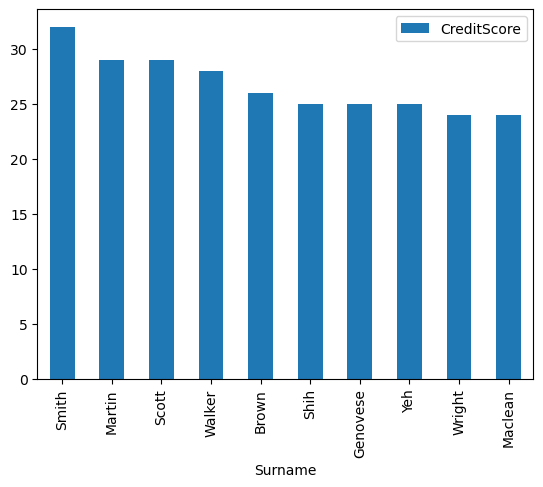

In [126]:
#Top 10 surnames based on credit score
df.groupby(['Surname'])['CreditScore'].count().sort_values(ascending=False).head(10).plot.bar()
plt.legend()

In [127]:
#based on geography number of males and females are present
df[['Geography','Gender']].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
dtype: int64

In [128]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

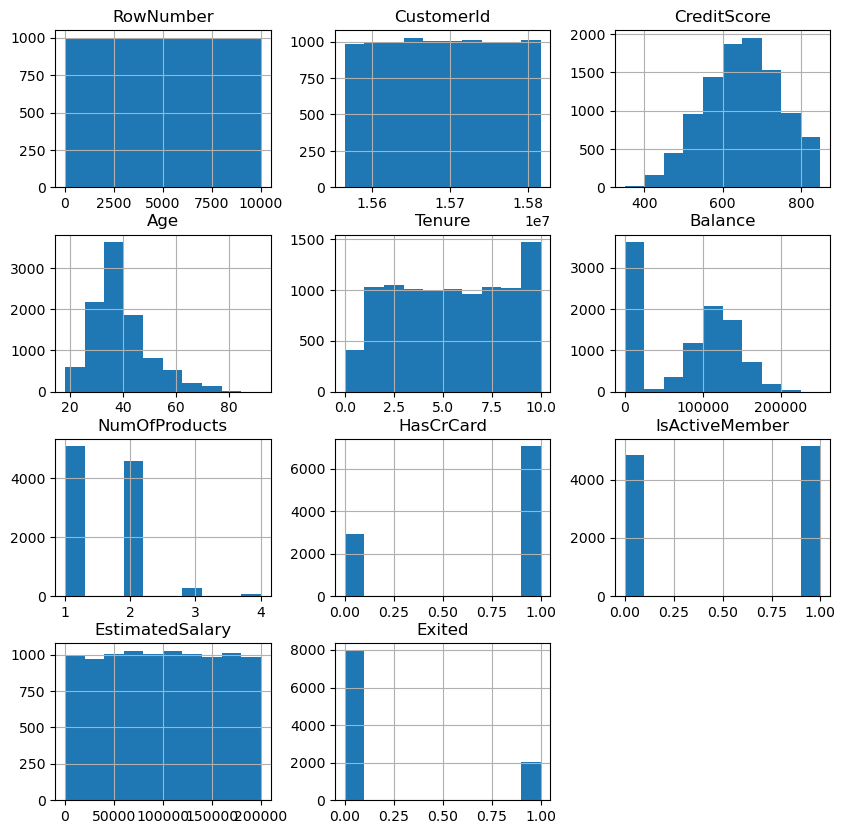

In [130]:
#histogram
df.hist(figsize=(10,10),bins=10)

In [131]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [132]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [133]:
#checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [134]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [135]:
df = df.drop(['RowNumber','CustomerId','Surname','Gender'],axis=1)

In [136]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [137]:
#categorial data in geography column may effect the final results for this purpose we have to use the encoders
#one hot encoding
encoding = pd.get_dummies(df,columns=['Geography'])

In [138]:
encoding.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [139]:
encoding['Exited'].value_counts()   #imbalance samples are distributed through the samples

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

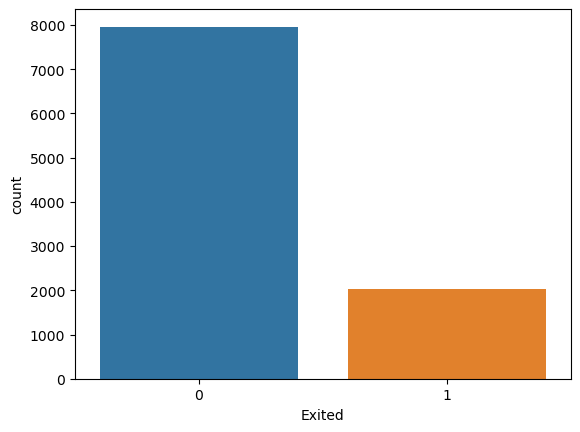

In [140]:
sns.countplot(x='Exited',data=df)

In [174]:
#assigning features
X = encoding.drop('Exited',axis=1)
Y = encoding['Exited']

In [175]:
#splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=23,stratify=Y)

In [176]:
#feature scaling
sc = StandardScaler()

In [177]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
#Logistic Regression
#building the model
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [179]:
#prediction
y_pred = model.predict(X_test)

In [180]:
#metrics
accuracy_score(Y_test,y_pred)

0.8115

In [181]:
f1_score(Y_test,y_pred)

0.3132969034608379

In [182]:
#ability of a model to correctly predict the positive values
recall_score(Y_test,y_pred)

0.2113022113022113

In [183]:
#ability of our model to predict the positive values
precision_score(Y_test,y_pred)

0.6056338028169014

In [184]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.61      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [185]:
#support vector classification
svm = svm.SVC()

In [186]:
svm.fit(X_train,Y_train)

SVC()

In [187]:
y_pred2 = svm.predict(X_test)

In [188]:
accuracy_score(Y_test,y_pred2)

0.8615

In [189]:
recall_score(Y_test,y_pred2)

0.40540540540540543

In [190]:
precision_score(Y_test,y_pred2)

0.825

In [191]:
f1_score(Y_test,y_pred2)

0.5436573311367381

In [192]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



In [194]:
#KNeighbors Classifier
knn = KNeighborsClassifier()

In [195]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [196]:
y_pred3 = knn.predict(X_test)

In [197]:
accuracy_score(Y_test,y_pred3)

0.84

In [198]:
recall_score(Y_test,y_pred3)

0.4275184275184275

In [199]:
precision_score(Y_test,y_pred3)

0.6666666666666666

In [200]:
f1_score(Y_test,y_pred3)

0.5209580838323353

In [206]:
#decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [207]:
y_pred4 = dt.predict(X_test)

In [208]:
accuracy_score(Y_test,y_pred4)

0.798

In [209]:
recall_score(Y_test,y_pred4)

0.5184275184275184

In [210]:
f1_score(Y_test,y_pred4)

0.5108958837772396

In [211]:
precision_score(Y_test,y_pred4)

0.5035799522673031

In [212]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [213]:
y_pred5 = RF.predict(X_test)

In [214]:
accuracy_score(Y_test,y_pred5)

0.869

In [215]:
precision_score(Y_test,y_pred5)

0.7865612648221344

In [216]:
recall_score(Y_test,y_pred5)

0.48894348894348894

In [217]:
f1_score(Y_test,y_pred5)

0.603030303030303

In [ ]:
#inorder to balance the imbalanced data we have to choose the SMOTE

In [156]:
from imblearn.over_sampling import SMOTE

In [158]:
X_ros ,Y_ros = SMOTE().fit_resample(X,Y)

In [159]:
Y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [160]:
#splitting the data after SMOTE
X_train,X_test,Y_train,Y_test = train_test_split(X_ros,Y_ros,test_size=0.20)

In [161]:
#after SMOTE 
sc1 = StandardScaler()

In [162]:
X_train = sc1.fit_transform(X_train)
X_test  = sc1.transform(X_test)

In [163]:
X_train

array([[ 0.83646207,  0.70406126,  0.06079953, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [-0.95064257,  0.20674251, -0.67236277, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [-0.05709025, -0.88735874, -1.03894392, ..., -0.78860439,
        -0.58073404,  2.17271731],
       ...,
       [ 1.11978354,  0.70406126, -0.30578162, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [ 0.52044967,  2.69333626, -0.67236277, ..., -0.78860439,
        -0.58073404, -0.46025316],
       [ 0.37878893, -0.19111249, -1.03894392, ..., -0.78860439,
         1.72195866, -0.46025316]])

In [164]:
X_test

array([[ 0.64031644,  0.10727876,  1.89370528, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [ 0.38968591, -1.08628624, -1.03894392, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [ 0.76018322,  0.20674251, -1.77210623, ...,  1.26806294,
        -0.58073404, -0.46025316],
       ...,
       [-0.47117547,  1.00245251, -0.67236277, ...,  1.26806294,
        -0.58073404, -0.46025316],
       [ 0.40058289,  0.30620626,  1.16054298, ..., -0.78860439,
        -0.58073404, -0.46025316],
       [-1.15768519, -0.19111249, -0.67236277, ...,  1.26806294,
        -0.58073404, -0.46025316]])

In [165]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [166]:
y_pred1 = model.predict(X_test)

In [167]:
accuracy_score(Y_test,y_pred1)

0.5514752040175769

In [169]:
precision_score(Y_test,y_pred1)

0.9192825112107623

In [170]:
recall_score(Y_test,y_pred1)

0.12685643564356436

In [171]:
f1_score(Y_test,y_pred1)

0.22294725394235998

In [218]:
#final conclusion about the all models 
final_model = pd.DataFrame({'Models':['LogisticRegression','Svm','RandomForestClassifier','DecisionTreeClassifier','KNN'],
                            'accuracy_score':[accuracy_score(Y_test,y_pred),
                                              accuracy_score(Y_test,y_pred2),
                                              accuracy_score(Y_test,y_pred5),
                                              accuracy_score(Y_test,y_pred4),
                                              accuracy_score(Y_test,y_pred3)]})

In [219]:
final_model

,Models,accuracy_score
0,LogisticRegression,0.8115
1,Svm,0.8615
2,RandomForestClassifier,0.8690
3,DecisionTreeClassifier,0.7980
4,KNN,0.8400


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'Svm'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'DecisionTreeClassifier'),
  Text(4, 0, 'KNN')])

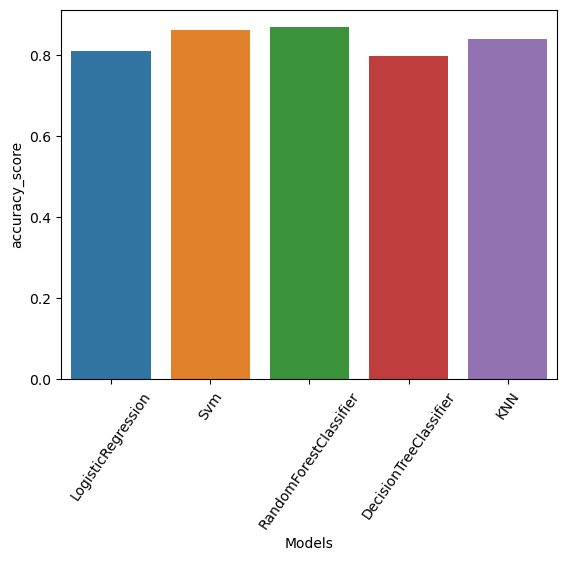

In [225]:
sns.barplot(x = final_model['Models'],y=final_model['accuracy_score'])
plt.xticks(rotation=55)

In [228]:
final_model1 = pd.DataFrame({'Models':['LogisticRegression','Svm','RandomForestClassifier','DecisionTreeClassifier','KNN'],
                            'precision_score':[precision_score(Y_test,y_pred),
                                              precision_score(Y_test,y_pred2),
                                              precision_score(Y_test,y_pred5),
                                              precision_score(Y_test,y_pred4),
                                              precision_score(Y_test,y_pred3)]})

In [229]:
final_model1

,Models,precision_score
0,LogisticRegression,0.605634
1,Svm,0.825000
2,RandomForestClassifier,0.786561
3,DecisionTreeClassifier,0.503580
4,KNN,0.666667


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'Svm'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'DecisionTreeClassifier'),
  Text(4, 0, 'KNN')])

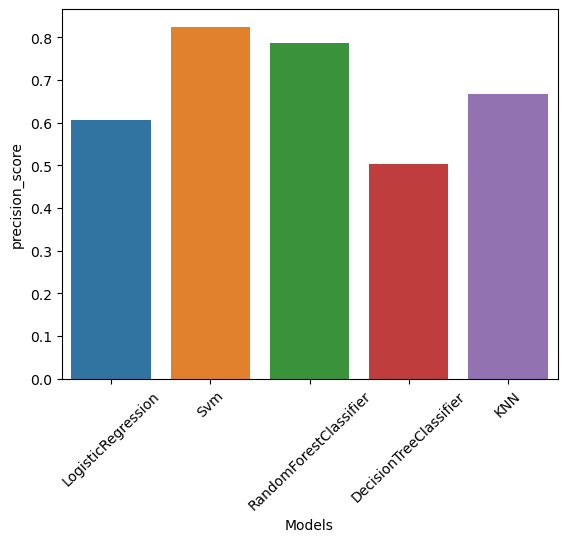

In [231]:
sns.barplot(x=final_model1['Models'],y=final_model1['precision_score'])
plt.xticks(rotation=44)

In [232]:
X_ros = sc.fit_transform(X_ros)

In [233]:
RF.fit(X_ros,Y_ros)

RandomForestClassifier()

In [234]:
!pip install joblib

In [236]:
import joblib

In [237]:
joblib.dump(RF,'churn_prediction_model')

['churn_prediction_model']

In [238]:
encoding.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [254]:
model.predict([[619,42,2,0,1,1,0,0,101348.88,0,0]]) #customer leave the bank

array([0], dtype=int64)

In [ ]:
conclusion:
1.among the all models RandomForestClassifier produces the high accuracy_score.